In [ ]:
TRAIN_PATH = "/content/drive/MyDrive/DATASETS/BreastCancerPrediction/train"
VAL_PATH = "/content/drive/MyDrive/DATASETS/BreastCancerPrediction/valid"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#CNN

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [ ]:
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
val_dataset=train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_dataset=image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

train_generator.class_indices

Found 2400 images belonging to 2 classes.


{'0_NoCancer': 0, '1_Cancer': 1}

In [ ]:
validation_generator = val_dataset.flow_from_directory(
    VAL_PATH,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

validation_generator.class_indices

Found 640 images belonging to 2 classes.


{'0_NoCancer': 0, '1_Cancer': 1}

In [ ]:
test_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/DATASETS/BreastCancerPrediction/test',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

test_generator.class_indices

Found 160 images belonging to 2 classes.


{'0_NoCancer': 0, '1_Cancer': 1}

In [ ]:
hist=model.fit_generator(
    train_generator,
    steps_per_epoch=15,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=4
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
15/15 [==============================] - 16s 722ms/step - loss: 1.1698 - accuracy: 0.5042 - val_loss: 0.6925 - val_accuracy: 0.4688
Epoch 2/50
15/15 [==============================] - 10s 690ms/step - loss: 0.6970 - accuracy: 0.4771 - val_loss: 0.6931 - val_accuracy: 0.4609
Epoch 3/50
15/15 [==============================] - 10s 695ms/step - loss: 0.6729 - accuracy: 0.4938 - val_loss: 0.6887 - val_accuracy: 0.7031
Epoch 4/50
15/15 [==============================] - 10s 677ms/step - loss: 0.6615 - accuracy: 0.5021 - val_loss: 0.6932 - val_accuracy: 0.4844
Epoch 5/50
15/15 [==============================] - 10s 687ms/step - loss: 0.6943 - accuracy: 0.5083 - val_loss: 0.6922 - val_accuracy: 0.5391
Epoch 6/50
15/15 [==============================] - 10s 677ms/step - loss: 0.6924 - accuracy: 0.5125 - val_loss: 0.6928 - val_accuracy: 0.4922
Epoch 7/50
15/15 [==============================] - 10s 672ms/step - loss: 0.6940 - accuracy: 0.4917 - val_loss: 0.6920 - val_accuracy: 0.5469

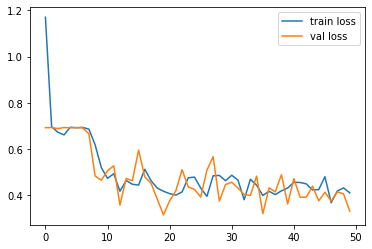

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

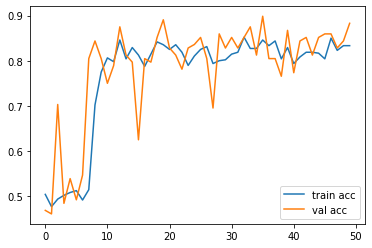

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(hist.history['accuracy'],label='train acc')
plt.plot(hist.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
a=max(hist.history['val_accuracy'])

In [ ]:
a

0.90625